In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

In [2]:
def plot_image(image_1, image_2, title_1 = "Original Image", title_2 = "New Image"):
    plt.figure(figsize = (10,10))
    plt.subplot(1,2,1)
    plt.imshow(image_1)
    plt.title(title_1)
    plt.figure(figsize =(10,10))
    plt.subplot(1,2,2)
    plt.imshow(image_2)
    plt.title(title_2)
    plt.show()

In [3]:
def plot_hist(old_image, new_image, title_old = "Original", title_new = "New image"):
    intensity_values = np.array([x for x in range(256)])
    plt.subplot(1,2,1)
    plt.bar(intensity_values, cv2.calcHist([old_image], [0], None, [256], [0,256])[:, 0], width =5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

In [4]:
def display_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

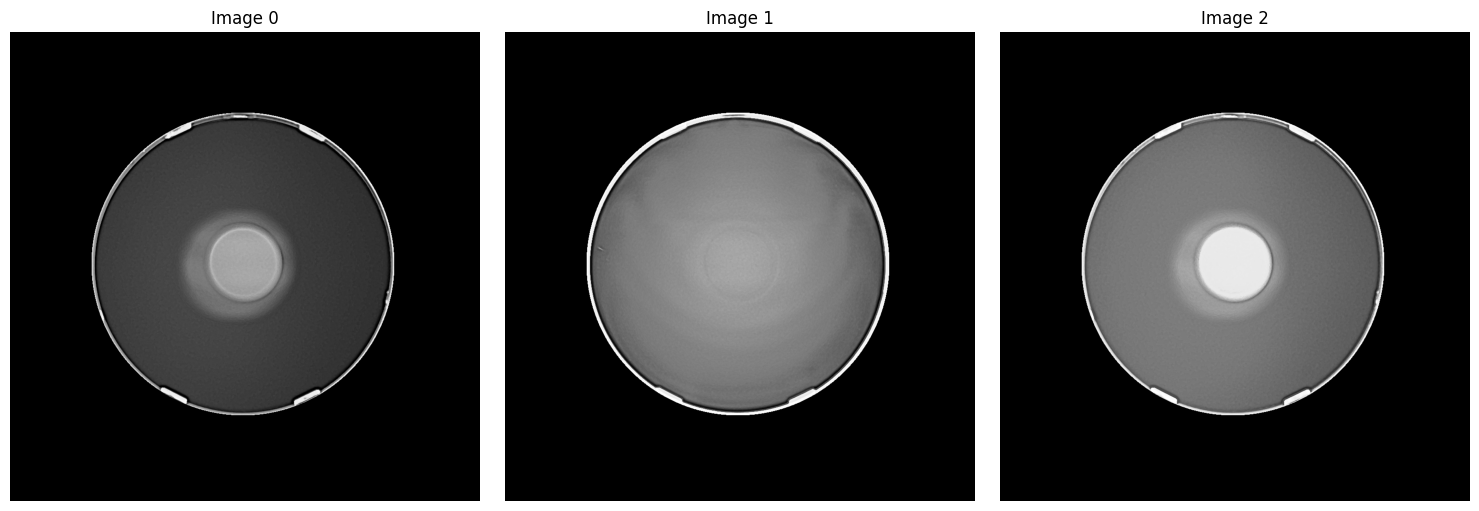

In [27]:
# visible NG
# image0 = cv2.imread("image_dataset/NG/I11-0001_NG_CT_ORG_00.png")
# image1 = cv2.imread("image_dataset/NG/I11-0001_NG_CT_ORG_01.png")
# image2 = cv2.imread("image_dataset/NG/I11-0001_NG_CT_ORG_02.png")

# invisible NG
# image0 = cv2.imread("image_dataset/NG-few/I8-5-0011_NG_CT_ORG_00.png")
# image1 = cv2.imread("image_dataset/NG-few/I8-5-0011_NG_CT_ORG_01.png")
# image2 = cv2.imread("image_dataset/NG-few/I8-5-0011_NG_CT_ORG_02.png")

# normal OK
image0 = cv2.imread("image_dataset/OK-few/I5-0101_CT_ORG_000.png")
image1 = cv2.imread("image_dataset/OK-few/I5-0101_CT_ORG_01.png")
image2 = cv2.imread("image_dataset/OK-few/I5-0101_CT_ORG_02.png")

# wave NG
# image0 = cv2.imread("image_dataset/NG-few/I1-0004_NG_CT_ORG_00.png")
# image1 = cv2.imread("image_dataset/NG-few/I1-0004_NG_CT_ORG_01.png")
# image2 = cv2.imread("image_dataset/NG-few/I1-0004_NG_CT_ORG_02.png")

# outer inner circle bold OK
# image0 = cv2.imread("image_dataset/OK-few/I5-0109_CT_ORG_000.png")
# image1 = cv2.imread("image_dataset/OK-few/I5-0109_CT_ORG_01.png")
# image2 = cv2.imread("image_dataset/OK-few/I5-0109_CT_ORG_02.png")
display_images([image0, image1, image2], ['Image 0', 'Image 1', 'Image 2'])

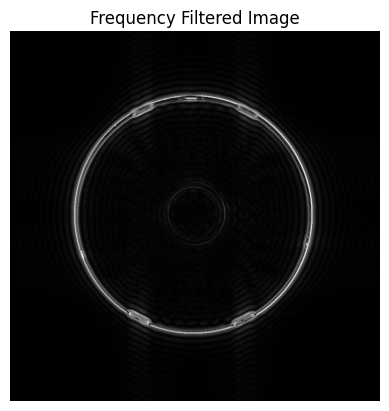

In [28]:
# Ensure the image is grayscale (single-channel)
if len(image0.shape) == 3:
    image0 = cv2.cvtColor(image0, cv2.COLOR_BGR2GRAY)

# Convert to float32 for DFT
image1_float = np.float32(image0)

# Apply FFT
dft = cv2.dft(image1_float, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Create a mask to remove low frequencies
rows, cols = image0.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0  # Block low frequencies

# Apply mask and inverse FFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
image_filtered = cv2.idft(f_ishift)
image_filtered = cv2.magnitude(image_filtered[:, :, 0], image_filtered[:, :, 1])

# Normalize the result for visualization
image_filtered = cv2.normalize(image_filtered, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Display the result
plt.imshow(image_filtered, cmap='gray')
plt.title("Frequency Filtered Image")
plt.axis('off')
plt.show()


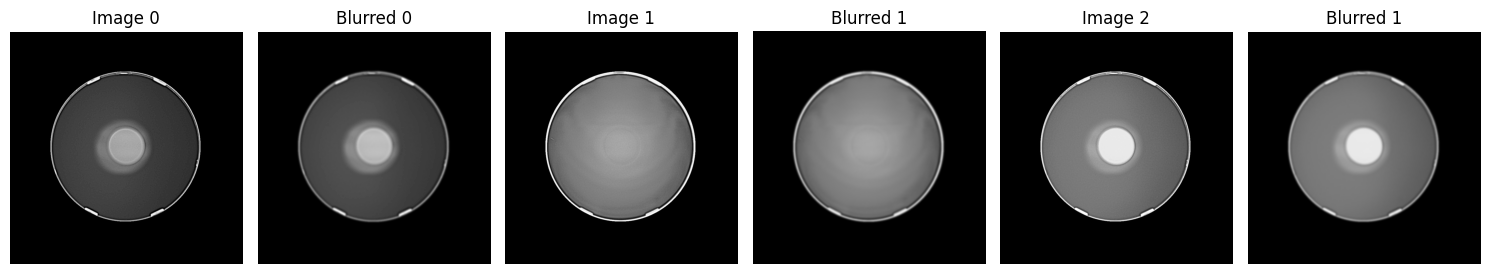

In [29]:
blurred0 = cv2.GaussianBlur(image0, (21, 21), 0)
blurred1 = cv2.GaussianBlur(image1, (21, 21), 0)
blurred2 = cv2.GaussianBlur(image2, (21, 21), 0)
display_images([image0,blurred0, image1, blurred1, image2, blurred2], ['Image 0', 'Blurred 0', 'Image 1', 'Blurred 1', 'Image 2', 'Blurred 1'])

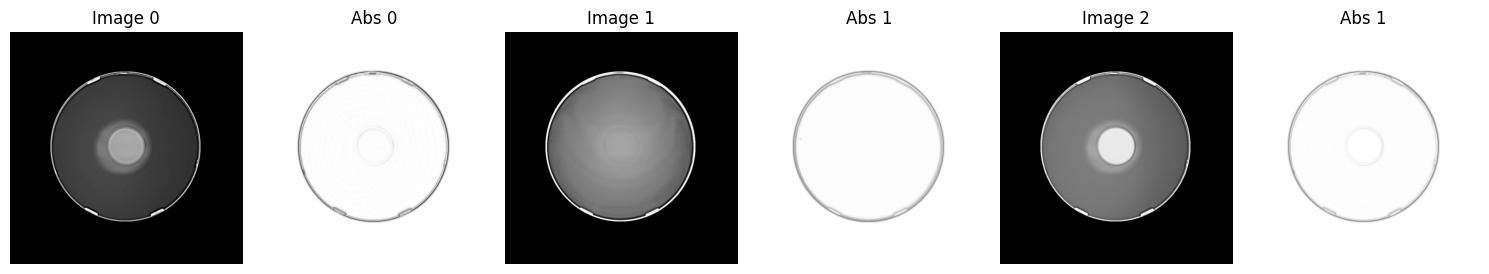

In [30]:
abs_diff2 = 255 - cv2.absdiff(image2, blurred2)
abs_diff1 = 255 - cv2.absdiff(image1, blurred1)
abs_diff0 = 255 - cv2.absdiff(image0, blurred0)
display_images([image0, abs_diff0, image1, abs_diff1, image2, abs_diff2], ['Image 0', 'Abs 0', 'Image 1', 'Abs 1', 'Image 2', 'Abs 1'])

In [ ]:
subtracted012 = cv2.subtract(abs_diff0, abs_diff1)
inversed = cv2.bitwise_not(subtracted012)
display_images([image0, image1, image2, subtracted012, inversed], ['Image 0', 'Image 1', 'Image 2', '3 subtraction', 'inversed'])

In [ ]:
plot_hist(abs_diff1, inversed, title_old = "abs_diff1", title_new = "Inversed")

In [33]:
high_pass0 = cv2.subtract(image0, blurred0)
high_pass1 = cv2.subtract(image1, blurred1)
high_pass2 = cv2.subtract(image2, blurred2)
high_pass0_8bit = cv2.normalize(high_pass0, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
high_pass1_8bit = cv2.normalize(high_pass1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
high_pass2_8bit = cv2.normalize(high_pass2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


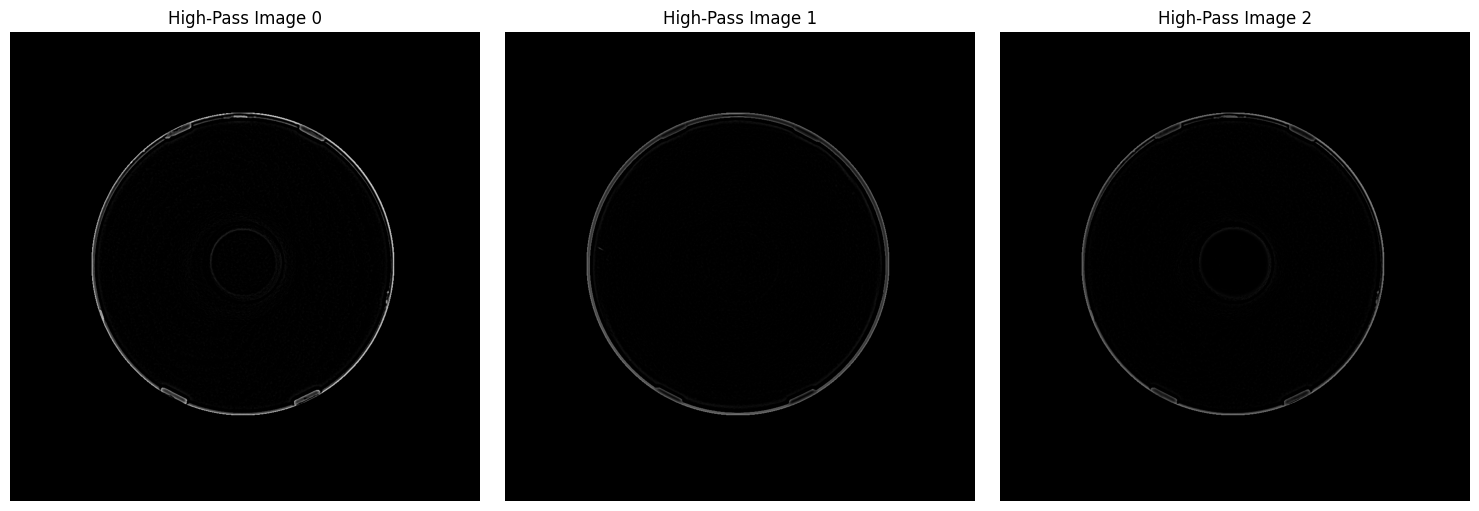

In [34]:
display_images([high_pass0, high_pass1, high_pass2], 
               ['High-Pass Image 0', 'High-Pass Image 1', 'High-Pass Image 2'])

In [35]:
print(f"Before conversion - Type: {high_pass0.dtype}, Shape: {high_pass0.shape}")

Before conversion - Type: uint8, Shape: (1024, 1024)


In [ ]:
high_pass0_gray = cv2.cvtColor(high_pass0, cv2.COLOR_BGR2GRAY)
high_pass1_gray = cv2.cvtColor(high_pass1, cv2.COLOR_BGR2GRAY)
high_pass2_gray = cv2.cvtColor(high_pass2, cv2.COLOR_BGR2GRAY)


high_pass0_8bit = cv2.normalize(high_pass0_gray, None, 0, 255, cv2.NORM_MINMAX)
high_pass0_8bit = high_pass0_8bit.astype(np.uint8)
high_pass1_8bit = cv2.normalize(high_pass1_gray, None, 0, 255, cv2.NORM_MINMAX)
high_pass1_8bit = high_pass1_8bit.astype(np.uint8)
high_pass2_8bit = cv2.normalize(high_pass2_gray, None, 0, 255, cv2.NORM_MINMAX)
high_pass2_8bit = high_pass2_8bit.astype(np.uint8)

In [37]:
print(f"After conversion - Type: {high_pass0_8bit.dtype}, Shape: {high_pass0_8bit.shape}")


After conversion - Type: uint8, Shape: (1024, 1024)


In [ ]:
binary0 = cv2.adaptiveThreshold(high_pass0_8bit, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 11, 2)
binary1 = cv2.adaptiveThreshold(high_pass1_8bit, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 11, 2)
binary2 = cv2.adaptiveThreshold(high_pass2_8bit, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 11, 2)

In [ ]:
display_images([binary0, binary1, binary2], 
               ['Adaptive threshold 0', 'adaptive threshold 1', 'tdaptive threshold 2'])

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
cleaned0 = cv2.morphologyEx(binary0, cv2.MORPH_OPEN, kernel)
cleaned1 = cv2.morphologyEx(binary1, cv2.MORPH_OPEN, kernel)
cleaned2 = cv2.morphologyEx(binary2, cv2.MORPH_OPEN, kernel)
display_images([cleaned0, cleaned1, cleaned2], 
               ['Cleaned Image 0', 'Cleaned Image 1', 'Cleaned Image 2'])

In [ ]:
edges0 = cv2.Canny(cleaned0, 50, 150)
edges1 = cv2.Canny(cleaned1, 50, 150)
edges2 = cv2.Canny(cleaned2, 50, 150)
display_images([edges0, edges1, edges2], 
               ['Canny Edges 0', 'Canny Edges 1', 'Canny Edges 2'])

In [42]:
print("Image 1 - Shape:", image0.shape, "Min:", np.min(image0), "Max:", np.max(image0), "Mean:", np.mean(image0))
print("Image 2 - Shape:", image1.shape, "Min:", np.min(image1), "Max:", np.max(image1), "Mean:", np.mean(image1))
print("Image 3 - Shape:", image2.shape, "Min:", np.min(image2), "Max:", np.max(image2), "Mean:", np.mean(image2))

Image 1 - Shape: (1024, 1024) Min: 0 Max: 255 Mean: 24.225518226623535
Image 2 - Shape: (1024, 1024, 3) Min: 0 Max: 255 Mean: 42.544936180114746
Image 3 - Shape: (1024, 1024, 3) Min: 0 Max: 255 Mean: 41.06201362609863


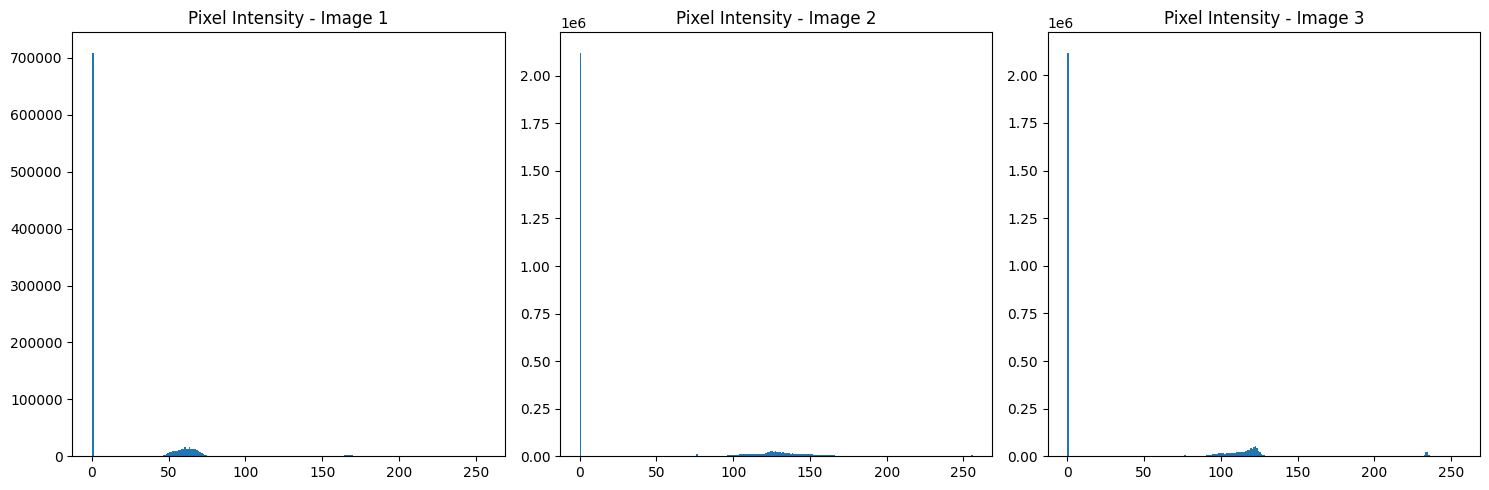

In [43]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(image0.ravel(), bins=256, range=[0, 256])
plt.title("Pixel Intensity - Image 1")

plt.subplot(1, 3, 2)
plt.hist(image1.ravel(), bins=256, range=[0, 256])
plt.title("Pixel Intensity - Image 2")

plt.subplot(1, 3, 3)
plt.hist(image2.ravel(), bins=256, range=[0, 256])
plt.title("Pixel Intensity - Image 3")
plt.tight_layout()
plt.show()

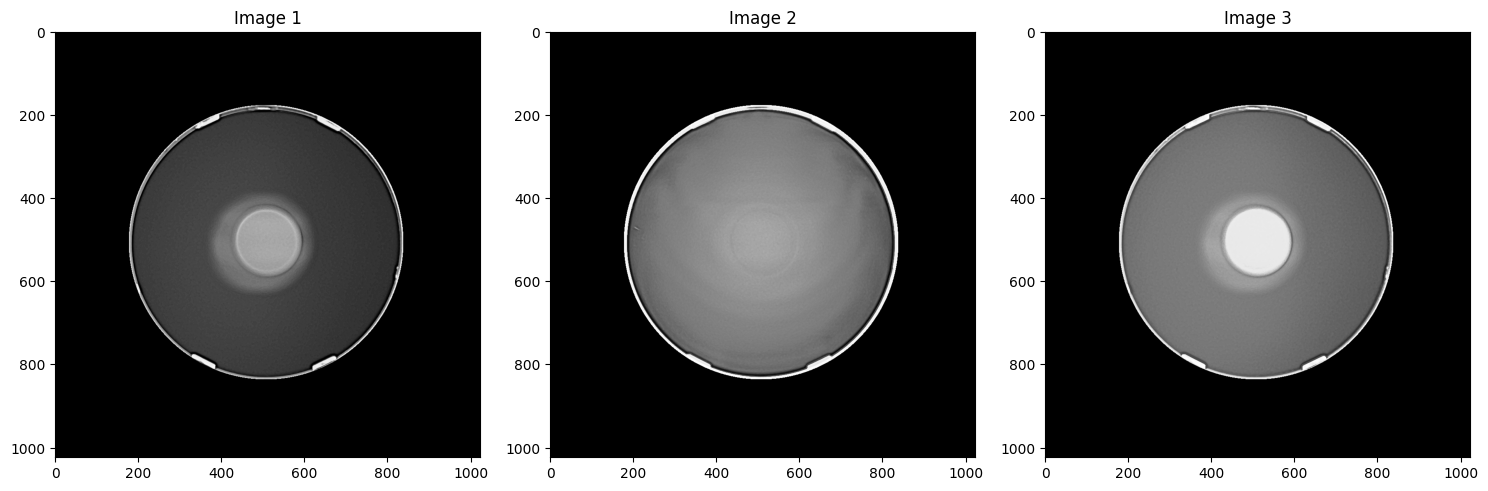

In [44]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image0, cmap='gray')
plt.title("Image 1")

plt.subplot(1, 3, 2)
plt.imshow(image1, cmap='gray')
plt.title("Image 2")

plt.subplot(1, 3, 3)
plt.imshow(image2, cmap='gray')
plt.title("Image 3")

plt.tight_layout()
plt.show()

In [ ]:
diff_1_0 = cv2.absdiff(image0, image1)
diff_2_1 = cv2.absdiff(image1, image2)
diff_0_2 = cv2.absdiff(image0, image1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(diff_1_0, cmap='gray')
plt.title("Difference between Image 1 and Image 2")

plt.subplot(1, 3, 2)
plt.imshow(diff_2_1, cmap='gray')
plt.title("Difference between Image 2 and Image 3")

plt.subplot(1, 3, 3)
plt.imshow(diff_0_2, cmap='gray')
plt.title("Difference between Image 1 and Image 3")

plt.tight_layout()
plt.show()

In [ ]:
combined_sum = cv2.add(cv2.add(diff_1_0, diff_2_1), diff_0_2)
combined_sum = cv2.normalize(combined_sum, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1), plt.imshow(diff_1_0, cmap='gray'), plt.title("ABS Diff Image 1")
plt.subplot(1, 4, 2), plt.imshow(diff_2_1, cmap='gray'), plt.title("ABS Diff Image 2")
plt.subplot(1, 4, 3), plt.imshow(diff_0_2, cmap='gray'), plt.title("ABS Diff Image 3")
plt.subplot(1, 4, 4), plt.imshow(combined_sum, cmap='gray'), plt.title("Combined Sum (Enhanced)")

In [ ]:
display_images([image1, combined_sum], ['Original Image', 'Combined Sum'])

In [ ]:
plot_hist(image1, combined_sum, "original", "combined")

In [50]:
laplacian_image = cv2.Laplacian(image2, cv2.CV_64F)
laplacian_image = cv2.convertScaleAbs(laplacian_image)

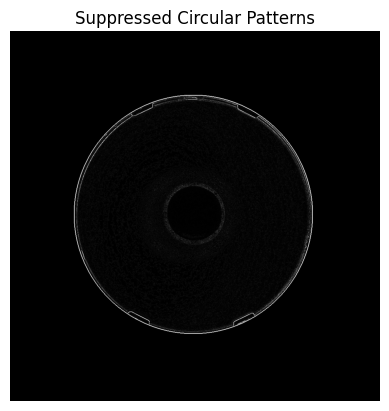

In [51]:
normalized = cv2.normalize(laplacian_image, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(normalized, cmap='gray')
plt.title("Suppressed Circular Patterns")
plt.axis('off')
plt.show()

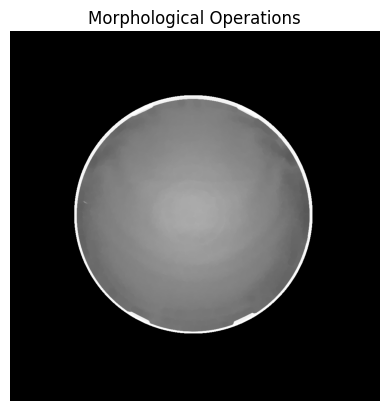

In [52]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
closed = cv2.morphologyEx(image1, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed, cmap='gray')
plt.title("Morphological Operations")
plt.axis('off')
plt.show()